In [2]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import inspect
from sqlalchemy import create_engine, func

In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import datetime as dt

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
Base.classes.keys()

# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
# use the session to query Measurement and Temperature table and display the first locations
session.query() 

In [20]:
results = session.query(Measurement.date, Measurement.prcp)

In [ ]:
# Use the session to query Data keys and display the first 15 weather data

print(results.all()).limit().all()

In [22]:
df = pd.DataFrame(results, columns=['date','measurement'])


In [23]:
df

,date,measurement
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,NaN
...,...,...
19545,2017-08-19,0.09
19546,2017-08-20,NaN
19547,2017-08-21,0.56
19548,2017-08-22,0.50


In [24]:
print(session)

In [25]:
session.query(Measurement.tobs)

In [26]:
# Convert the June temperatures to a list
prev_year = dt.date(2017, 6, 1) - dt.timedelta(days=365)


In [39]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)

In [40]:
df = pd.DataFrame(results, columns=['date','tobs'])

In [41]:
print(results)

SELECT measurement.date AS measurement_date, measurement.prcp AS measurement_prcp 
FROM measurement 
WHERE measurement.date >= ?


## D1: Determine the Summary Statistics for June

In [42]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date) == 6).all()
results

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [43]:
# Year and month together
date_list = [t.date for t in results]
date_list

['2010-06-01',
 '2010-06-02',
 '2010-06-03',
 '2010-06-04',
 '2010-06-05',
 '2010-06-06',
 '2010-06-07',
 '2010-06-08',
 '2010-06-09',
 '2010-06-10',
 '2010-06-11',
 '2010-06-12',
 '2010-06-13',
 '2010-06-14',
 '2010-06-15',
 '2010-06-16',
 '2010-06-17',
 '2010-06-18',
 '2010-06-19',
 '2010-06-20',
 '2010-06-21',
 '2010-06-22',
 '2010-06-23',
 '2010-06-24',
 '2010-06-25',
 '2010-06-26',
 '2010-06-27',
 '2010-06-28',
 '2010-06-29',
 '2010-06-30',
 '2011-06-01',
 '2011-06-02',
 '2011-06-03',
 '2011-06-04',
 '2011-06-05',
 '2011-06-06',
 '2011-06-07',
 '2011-06-08',
 '2011-06-09',
 '2011-06-10',
 '2011-06-11',
 '2011-06-12',
 '2011-06-13',
 '2011-06-14',
 '2011-06-15',
 '2011-06-17',
 '2011-06-18',
 '2011-06-19',
 '2011-06-20',
 '2011-06-21',
 '2011-06-24',
 '2011-06-25',
 '2011-06-26',
 '2011-06-27',
 '2011-06-28',
 '2011-06-29',
 '2012-06-01',
 '2012-06-02',
 '2012-06-03',
 '2012-06-04',
 '2012-06-05',
 '2012-06-06',
 '2012-06-07',
 '2012-06-08',
 '2012-06-09',
 '2012-06-10',
 '2012-06-

In [44]:
#  3. Convert the June temperatures to a list.
temperature_list = [t.tobs for t in results]
temperature_list

[78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 77.0,
 77.0,
 82.0,
 78.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 73.0,
 70.0,
 76.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 75.0,
 76.0,
 76.0,
 77.0,
 78.0,
 76.0,
 77.0,
 75.0,
 77.0,
 76.0,
 76.0,
 75.0,
 77.0,
 77.0,
 76.0,
 78.0,
 77.0,
 76.0,
 77.0,
 76.0,
 76.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 73.0,
 75.0,
 77.0,
 76.0,
 77.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 79.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 76.0,
 77.0,
 75.0,
 76.0,
 74.0,
 75.0,
 77.0,
 76.0,
 77.0,
 78.0,
 79.0,
 77.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 78.0,
 79.0,
 79.0,
 82.0,
 80.0,
 79.0,
 79.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 75.0,
 75.0,
 76.0,
 84.0,
 79.0,
 76.0,
 79.0,

In [45]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temperature_df = pd.DataFrame(temperature_list, columns = ['june_temperature'])
june_temperature_df

,june_temperature
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [46]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temperature_df.describe()

,june_temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<AxesSubplot:>

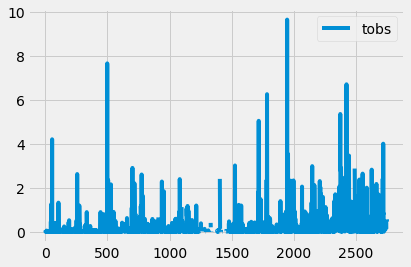

In [47]:
df.plot()

## D2: Determine the Summary Statistics for December

In [48]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date) == 12).all()
results

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [49]:
# 7. Convert the December temperatures to a list.
temperature_list = [t.tobs for t in results]
temperature_list

[76.0,
 74.0,
 74.0,
 64.0,
 64.0,
 67.0,
 77.0,
 66.0,
 69.0,
 68.0,
 68.0,
 71.0,
 74.0,
 67.0,
 66.0,
 69.0,
 71.0,
 70.0,
 70.0,
 74.0,
 74.0,
 71.0,
 75.0,
 75.0,
 72.0,
 69.0,
 68.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 73.0,
 71.0,
 73.0,
 73.0,
 77.0,
 72.0,
 71.0,
 73.0,
 70.0,
 73.0,
 69.0,
 74.0,
 72.0,
 71.0,
 72.0,
 72.0,
 70.0,
 73.0,
 73.0,
 72.0,
 73.0,
 73.0,
 72.0,
 63.0,
 65.0,
 71.0,
 76.0,
 70.0,
 76.0,
 69.0,
 69.0,
 69.0,
 74.0,
 76.0,
 74.0,
 73.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 74.0,
 74.0,
 71.0,
 73.0,
 72.0,
 64.0,
 66.0,
 73.0,
 72.0,
 65.0,
 64.0,
 69.0,
 68.0,
 77.0,
 71.0,
 71.0,
 69.0,
 68.0,
 68.0,
 69.0,
 70.0,
 72.0,
 76.0,
 75.0,
 69.0,
 71.0,
 71.0,
 71.0,
 68.0,
 65.0,
 70.0,
 69.0,
 69.0,
 71.0,
 67.0,
 73.0,
 74.0,
 73.0,
 67.0,
 74.0,
 75.0,
 75.0,
 74.0,
 67.0,
 73.0,
 73.0,
 71.0,
 72.0,
 71.0,
 68.0,
 65.0,
 69.0,
 70.0,
 70.0,
 74.0,
 71.0,
 74.0,
 73.0,
 72.0,
 74.0,
 72.0,
 74.0,
 75.0,
 74.0,
 70.0,
 74.0,
 70.0,
 66.0,
 61.0,
 63.0,

In [50]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temperature_df = pd.DataFrame(temperature_list, columns = ['dec_temperature'])
dec_temperature_df

,dec_temperature
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [51]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temperature_df.describe()


,dec_temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:>

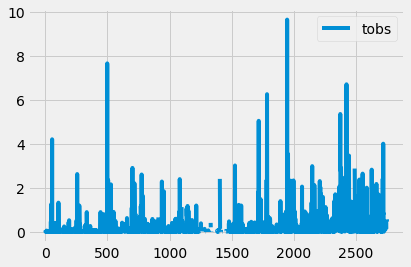

In [52]:
df.plot()